In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('..\data\gdp_percapita.csv')

In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN


gdp_df = gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [10]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [11]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value' : 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [13]:
gdp_df.value_counts('Country')

Country
Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (excluding high income)    33
Middle income                                         33
Mongolia                                              33
                                                      ..
Kosovo                                                15
Sint Maarten (Dutch part)                             14
Turks and Caicos Islands                              12
Somalia                                               10
Djibouti                                              10
Name: count, Length: 242, dtype: int64

In [14]:
df_by_ctry = gdp_df.groupby('Country').nunique()
df_by_ctry.reset_index()
df_by_ctry

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
...,...,...
Viet Nam,33,33
West Bank and Gaza,29,29
World,33,33


In [15]:
df1 = df_by_ctry.groupby('Year')
df1.head()

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
Angola,33,33
Aruba,32,32
Bhutan,32,32
Bosnia and Herzegovina,29,29


In [16]:
df = gdp_df.groupby('Country')['Year'].nunique()
df.head(10)

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
Angola                         33
Antigua and Barbuda            33
Arab World                     33
Argentina                      33
Armenia                        33
Name: Year, dtype: int64

In [17]:
df.describe()

count    242.000000
mean      31.661157
std        3.927885
min       10.000000
25%       33.000000
50%       33.000000
75%       33.000000
max       33.000000
Name: Year, dtype: float64

In [18]:
country_counts = gdp_df.value_counts('Country')
country_counts = country_counts.reset_index()
country_counts

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (excluding high inc...,33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [20]:
df20 = gdp_df.loc[gdp_df['Year']==2020]
df20

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [21]:
afg20 = gdp_df.loc[gdp_df['Country']=='Afghanistan']
afg20

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

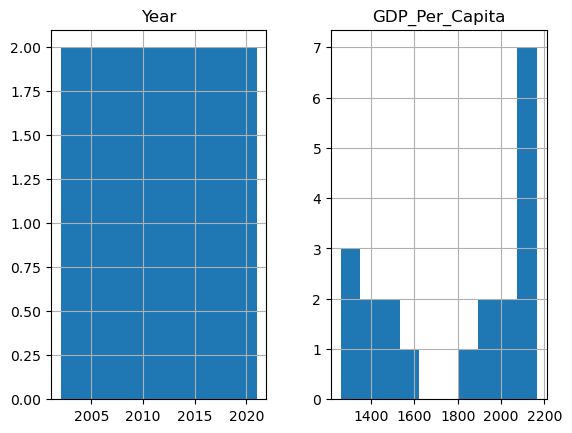

In [22]:
afg20.hist()

<Axes: xlabel='GDP_Per_Capita', ylabel='Country'>

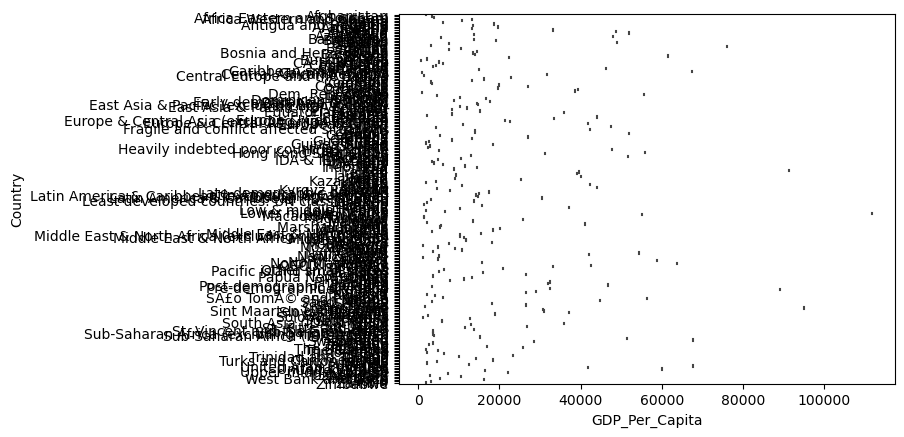

In [24]:

sns.violinplot(x=df20['GDP_Per_Capita'], y=df20['Country'])

C:\Users\shane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

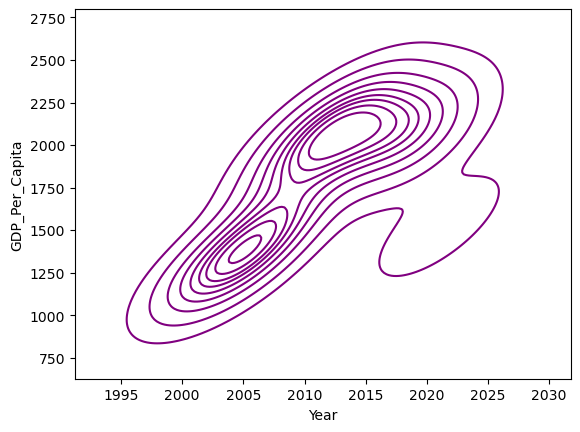

In [26]:
sns.kdeplot(data=afg20, x='Year', y = 'GDP_Per_Capita', color="purple")

<Axes: xlabel='GDP_Per_Capita', ylabel='Country'>

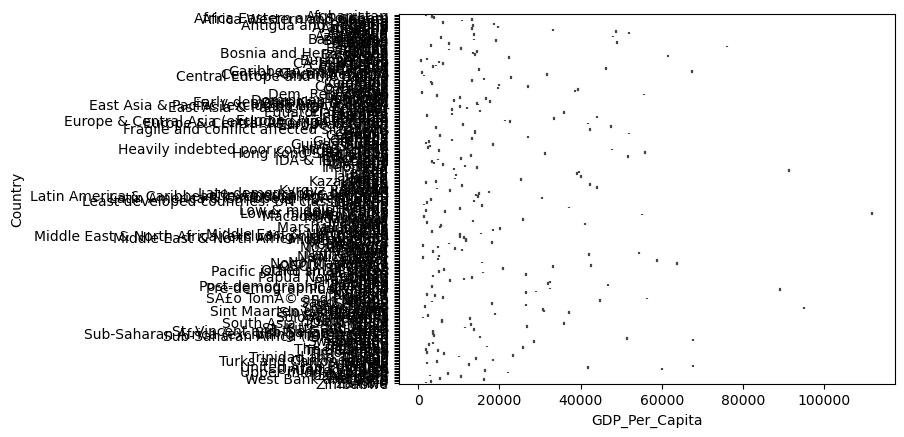

In [33]:
sns.boxplot( y=df20['Country'], x=df20['GDP_Per_Capita'])